<div style="font-size:18pt; padding-top:20px; text-align:center"><b>Дескриптивный анализ данных</b> </div><hr>
<div style="text-align:right;"><span style="font-style: italic;font-weight: bold;"></span></div>

<p>Подключение стилей оформления</p>

In [2]:
%%html
<link href="css/style.css" rel="stylesheet" type="text/css">

<p><b>Анализ индекса восприятия коррупции (Corruption Perceptions Index, CPI)</b></p>

<p>1. Подключение библиотек</p>

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import openpyxl
import os

<p>2. Загрузка данных из "data/CPI2021.xlsx" в DataFrame. Исходные данные и пояснения <a href="https://www.transparency.org/en/cpi/2021/index">по ссылке</a></p>

In [4]:
path = 'D:\\Загрузки\\CPI2021_regionalTables.xlsx'

# Загрузка таблицы excel в виде объекта openpyxl и его конвертация в DataFrame
A = openpyxl.load_workbook(path)
df = pd.DataFrame(A)

<p>3. Сортировка данных по убыванию индекса DataFrame</p>

In [5]:
f = df.loc[0] # Оставили первый лист

f = np.array(f)

for i in range(len(f)):
    f[i] = np.array(f[i])

# Убираем первые две лишние строки (название таблицы и пустая строка)
f = f[2:]

# Создаем список колонок для DataFrame
col = [f[0][i].value for i in range(len(f[0]))]

g = []
for i in range(len(f)):
    g.append([])
    for j in range(len(f[0])):
        g[i].append(f[i][j].value)

g = pd.DataFrame(g[1:], columns=col)

g = g.sort_values(by='CPI score 2021')

<p>4. Отображение данных по индексу CPI за 2021 год в виде горизонтальной гистограммы</p>

<AxesSubplot:ylabel='Country / Territory'>

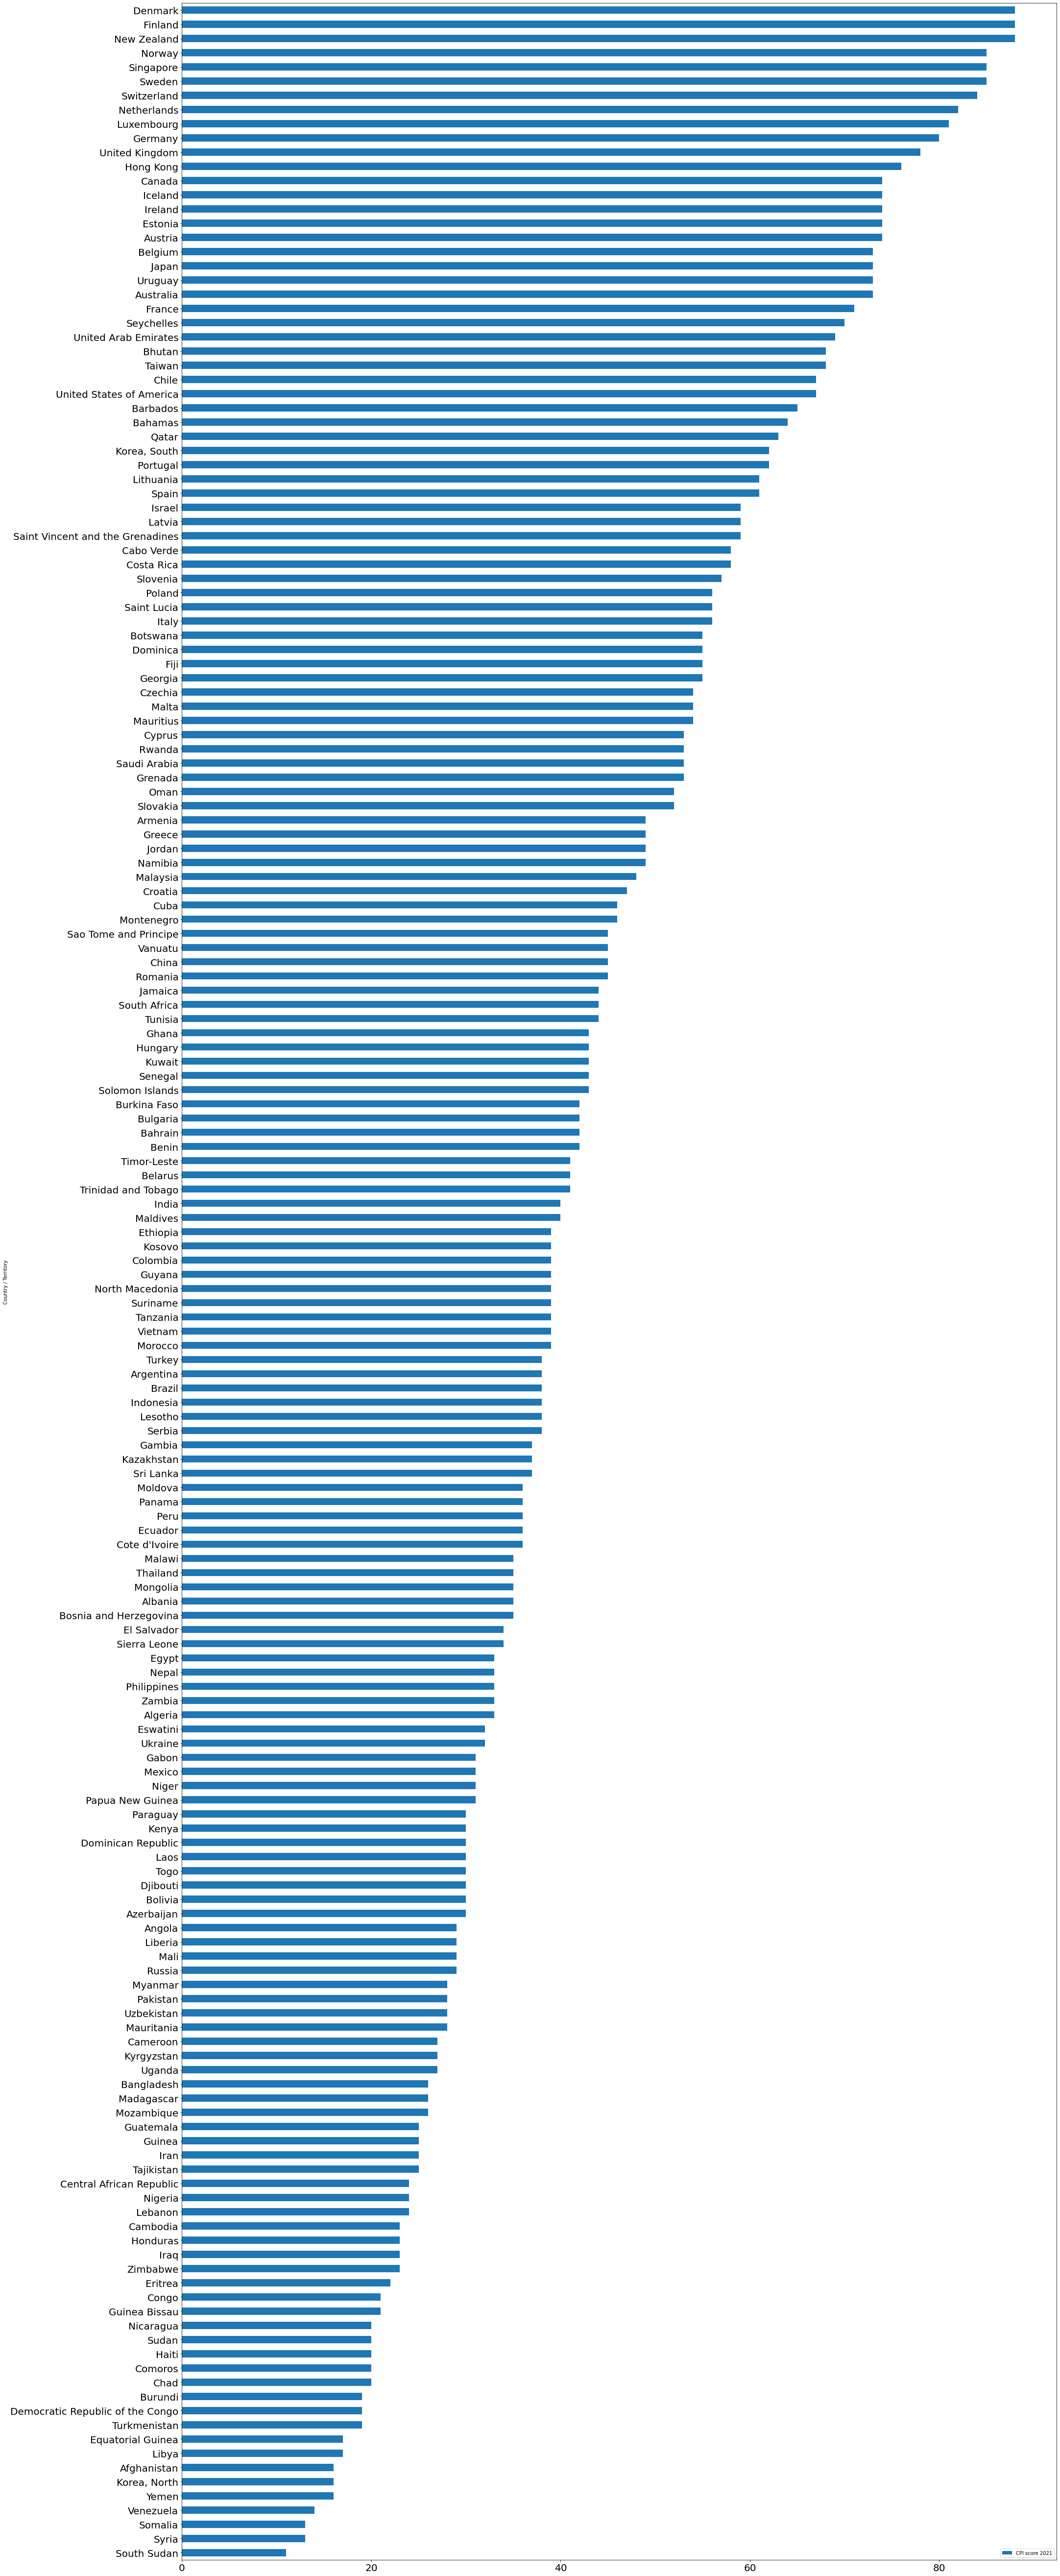

In [6]:
g.plot.barh(x=g.columns[0], y=g.columns[3], fontsize=20, figsize=(32,96))

<p>5. Создание DataFrame для региона Sub Saharah Africa</p>

In [7]:
r = df.loc[5] # Оставили первый лист

# Переводим r в np.array
r = np.array(r)

for i in range(len(r)):
    r[i] = np.array(r[i])

# Убираем первые две лишние строки (название таблицы и пустая строка)
# и последние строки (пустые)
r = r[2:52]

# Создаем список колонок для DataFrame
col = [r[0][i].value for i in range(len(r[0]))]

ssa_df = []

for i in range(len(r)):
    ssa_df.append([])
    for j in range(len(r[0])):
        ssa_df[i].append(r[i][j].value)

ssa_df = pd.DataFrame(ssa_df[1:], columns=col)

ssa_df

,Country / Territory,ISO3,CPI score 2021,Rank,Standard error,Number of sources,Lower CI,Upper CI,African Development Bank CPIA,Bertelsmann Foundation Sustainable Governance Index,...,Economist Intelligence Unit Country Ratings,Freedom House Nations in Transit,Global Insights Country Risk Ratings,IMD World Competitiveness Yearbook,PERC Asia Risk Guide,PRS International Country Risk Guide,Varieties of Democracy Project,World Bank CPIA,World Economic Forum EOS,World Justice Project Rule of Law Index
0,Seychelles,SYC,70,23,1.343867,3,67.789340,72.21066,,,...,72,,71,,,,67,,,
1,Cabo Verde,CPV,58,39,2.965474,4,53.121800,62.87820,,,...,,,59,,,,64,60,48,
2,Botswana,BWA,55,45,3.191742,8,49.749580,60.25042,,,...,72,,59,32,,51,72,,40,54
3,Mauritius,MUS,54,49,1.597818,6,51.371590,56.62841,,,...,55,,59,,,,50,,61,50
4,Rwanda,RWA,53,52,3.589662,7,47.095010,58.90499,49,,...,,,59,,,,49,43,79,57
5,Namibia,NAM,49,58,2.614393,7,44.699330,53.30067,,,...,55,,59,,,50,60,,42,46
6,Sao Tome and Principe,STP,45,66,4.820227,4,37.070720,52.92928,32,,...,,,47,,,,59,43,,
7,South Africa,ZAF,44,70,2.354487,8,40.126870,47.87313,,,...,55,,47,24,,49,51,,32,43
8,Ghana,GHA,43,73,1.530811,9,40.481820,45.51818,49,,...,55,,47,,,50,34,43,34,33
9,Senegal,SEN,43,73,1.352063,9,40.775860,45.22414,42,,...,55,,47,,,32,51,43,37,44


<p>6. Построение графиков индекса CPI за 2012-2021 для стран выбранного региона</p>

C:\Users\1311117\anaconda3\lib\site-packages\openpyxl\worksheet\_reader.py:312: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)


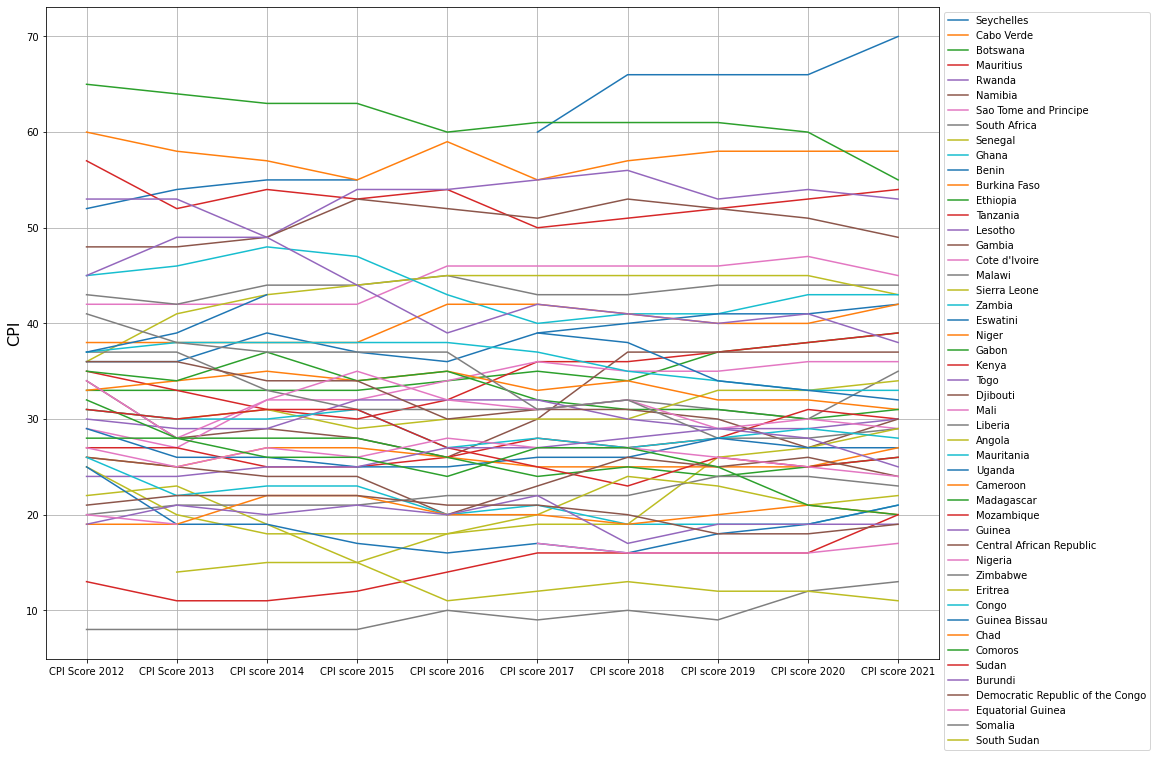

In [23]:
path_2 = 'D:\\Загрузки\\CPI2021_GlobalResults&Trends.xlsx'

# Загрузка таблицы excel в виде объекта openpyxl и его конвертация в DataFrame
B = openpyxl.load_workbook(path_2)
df_2 = pd.DataFrame(B)

lst = df_2.loc[1] # Оставили второй лист из второго excel файла

lst = np.array(lst)

for i in range(len(lst)):
    lst[i] = np.array(lst[i])

# Убираем первые две лишние строки (название таблицы и пустая строка)
lst = lst[2:]

# Создаем список колонок для DataFrame
col = [lst[0][i].value for i in range(len(lst[0]))]

series = []

for i in range(len(lst)):
    series.append([])
    for j in range(len(lst[0])):
        series[i].append(lst[i][j].value)

series = pd.DataFrame(series[1:], columns=col)

# Извлекаем строки, соответствующие странам на юге Сахары (SSA)
ser = series.loc[series['Region'] == 'SSA']

# a содержит строки с годами. а1 нужен, так как в датасете слово 'Score'
# для 2012 и 2013 годов написано с большой буквы, а для остальных с маленькой
a_1 = ['CPI Score 2012', 'CPI Score 2013']
a = a_1 + list(map(lambda x: 'CPI score 20' + x, [str(i) for i in range(14,22)]))
# b содержит значения CPI для каждой страны (индекс 1 - страна, 2 - год)
b = list(map(lambda x: ser[a].loc[x], ser.index))

# Строим график
fig, ax = plt.subplots(figsize=(16,12))
for i in range(len(b)):
    plt.plot(a, b[i], label=ser['Country / Territory'].iloc[i])
ax.set_ylabel('CPI', fontsize=16)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))

<p>7. Поиск стран с наибольшим и наименьшим значением CPI региона Sub Saharah Africa за 2021 год</p>

In [25]:
y1 = ser.loc[ser['CPI score 2021'] == max(ser['CPI score 2021'])]['Country / Territory']
y2 = ser.loc[ser['CPI score 2021'] == min(ser['CPI score 2021'])]['Country / Territory']
print('max CPI_2021:\n{}\n\nmin CPI_2021:\n{}'.format(y1, y2))

max CPI_2021:
22    Seychelles
Name: Country / Territory, dtype: object

min CPI_2021:
179    South Sudan
Name: Country / Territory, dtype: object


<p>8. Опредение средних значений CPI за каждый год в период с 2012 по 2021</p>

In [33]:
av = ser[a].mean()
print('CPI_mean:\n\n{}'.format(av))

CPI_mean:

CPI Score 2012    33.354167
CPI Score 2013    32.122449
CPI score 2014    32.729167
CPI score 2015    32.297872
CPI score 2016    31.456522
CPI score 2017    32.020408
CPI score 2018    32.244898
CPI score 2019    32.244898
CPI score 2020    32.306122
CPI score 2021    32.510204
dtype: float64


<p>9. Построение графиков индекса CPI за 2012-2021 для стран региона Sub Saharah Africa с выделенными странами с наибольшим и наименьшим значением CPI за 2021 год, а также отображенными средним значением по региону и CPI РФ</p>

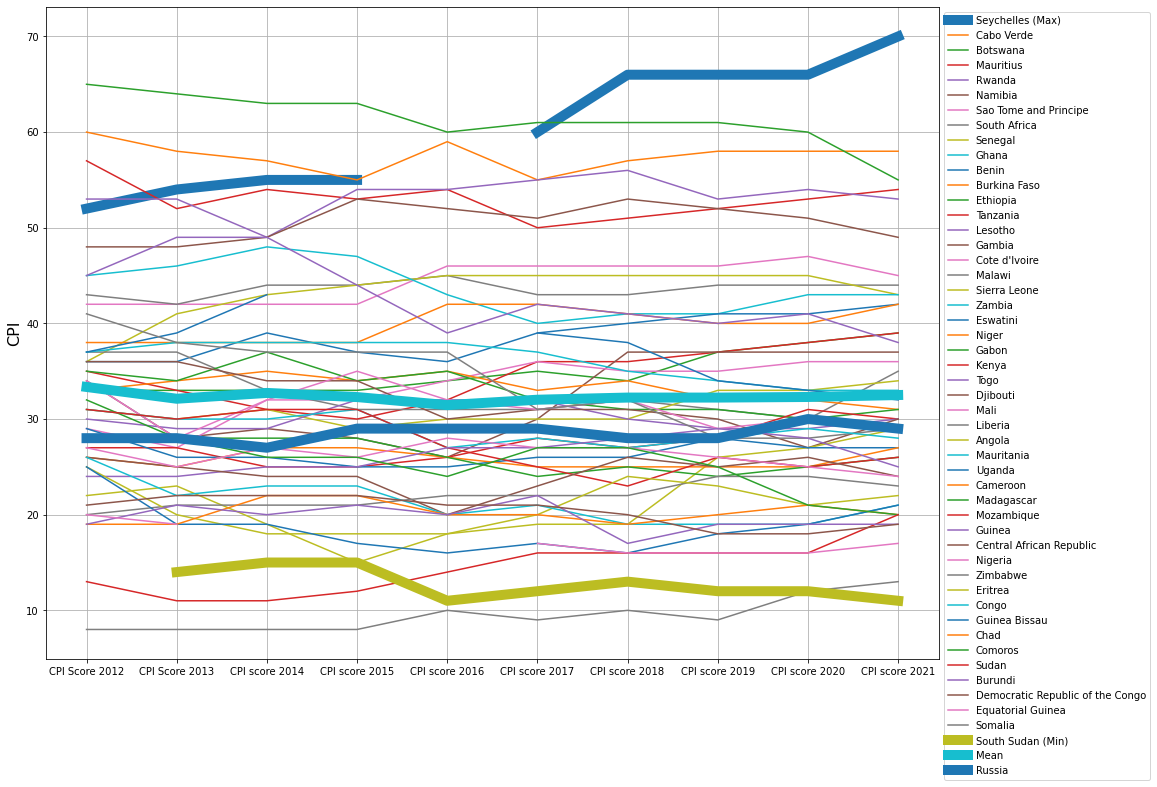

In [40]:
# Извлекаем данные для России по CPI
rus = series.loc[series['Country / Territory'] == 'Russia']
cpi_rus = rus[a].loc[rus.index[0]]

# Строим график
fig, ax = plt.subplots(figsize=(16,12))
for i in range(len(b)):
    if b[i].name == y1.index[0]:
        plt.plot(a, b[i], label=ser['Country / Territory'].iloc[i] + ' (Max)', linewidth=10)
    elif b[i].name == y2.index[0]:
        plt.plot(a, b[i], label=ser['Country / Territory'].iloc[i] + ' (Min)', linewidth=10)
    else:
        plt.plot(a, b[i], label=ser['Country / Territory'].iloc[i])
plt.plot(a, av, label='Mean', linewidth=10)
plt.plot(a, cpi_rus, label='Russia', linewidth=10)
ax.set_ylabel('CPI', fontsize=16)
plt.grid()
plt.legend(bbox_to_anchor=(1, 1))

<p>10. Расчет изменения позиций стран в рейтинге c 2012 по 2021</p>

In [41]:
# Сортируем датафрейм по столбцу CPI Score 2012 и извлекаем этот столбец,
# все nan заменяем на 0
sorted_ser = series.sort_values(by='CPI Score 2012', ascending=False)
cpi_2012 = [i for i in sorted_ser['CPI Score 2012'].fillna(-1)]


rank_2012 = [0 for i in range(len(cpi_2012))]

num = 1
mx = max(cpi_2012)
for i in range(len(cpi_2012)):
    if cpi_2012[i] == mx:
        rank_2012[i] = num
    elif cpi_2012[i] == -1:
        rank_2012[i] = -1
    else:
        mx = max(cpi_2012[i:])
        num = i + 1
        rank_2012[i] = num

rank_2012 = np.array(rank_2012)
rank_2021 = np.array(sorted_ser['Rank 2021'].fillna(-1))

dif = [rank_2021[i] - rank_2012[i] if rank_2012[i] != -1 \
       and rank_2021[i] != -1 else 'unknown' for i in range(len(rank_2021))]

growth = pd.Series( dif, index = list(sorted_ser['Country / Territory']) )

growth

Denmark                0.0
Finland                0.0
New Zealand            0.0
Sweden                 0.0
Singapore             -1.0
                    ...   
Grenada            unknown
Vanuatu            unknown
Solomon Islands    unknown
Maldives           unknown
South Sudan        unknown
Length: 181, dtype: object

<p>11. Вывод данных для стран с максимальным и мимимальным CPI за 2021 год, средних значений и данных для РФ </p>

In [42]:
columns = ["Region", "Country / Territory", "CPI Score 2012", "CPI score 2021", "Change in Position"]

# К сортированному датафрейму добавляем колонку Change in Position
sorted_ser[columns[-1]] = dif

# Извлекаем данные стран, у которых максимальный и минимальный CPI за 2021 год
y_max = sorted_ser.loc[sorted_ser['CPI score 2021'] == max(sorted_ser['CPI score 2021'])][columns]
y_min = sorted_ser.loc[sorted_ser['CPI score 2021'] == min(sorted_ser['CPI score 2021'])][columns]

index = ["max_2021_"+str(i) for i in range(len(y_max))]
index.append(["min_2021_"+str(i) for i in range(len(y_min))][0])
index.append("mean_2021")
index.append("Russia_2021")

# Складываем датафреймы y_max и y_min (добавляем строки)
df_new = y_max.append(y_min)

# Извлекаем среднее значение по всем странам в разные годы
av = ['Mean', 'Mean', sorted_ser[columns]['CPI Score 2012'].mean(),\
      sorted_ser[columns]['CPI score 2021'].mean(), 'Mean']

av = pd.Series( av, index=columns )

df_new = df_new.append(av, ignore_index=True)

rus = sorted_ser.loc[sorted_ser['Country / Territory'] == 'Russia'][columns]

df_new = df_new.append(rus, ignore_index=True)

df_new.index = index
df_new

,Region,Country / Territory,CPI Score 2012,CPI score 2021,Change in Position
max_2021_0,WE/EU,Denmark,90.000000,88.000000,0.0
max_2021_1,WE/EU,Finland,90.000000,88.000000,0.0
max_2021_2,AP,New Zealand,90.000000,88.000000,0.0
min_2021_0,SSA,South Sudan,NaN,11.000000,unknown
mean_2021,Mean,Mean,43.154286,43.266667,Mean
Russia_2021,ECA,Russia,28.000000,29.000000,4.0


<p><b>Анализ рынка акций</b> </p>

<p>1. Загрузка в один dataframe данных из всех файлов в папке /data/stock <a href="https://github.com/MLMethods/Assignments/tree/master/data/A1_Descriptive_Analysis">по ссылке</a>. Назначение индексов по столбцу "Date", а стоблцы соответствую названиям акций. Значения в датафрейме - цены закрытия (столбец "Close" в файлах .csv)</p>

In [44]:
path_3 = 'D:\\Python\\Git_practice\\MLAssignments\\Assignments\\data\\A1_Descriptive_Analysis\\stock\\'

files = os.listdir(path_3)

os.chdir(path_3)

a = pd.read_csv(path_3 + files[0])
index = a['Date']

data = a['Close']
data = pd.DataFrame(data)
data.columns = [files[0][:-4]]

for i in range( 1, len(files) ):
    a = pd.read_csv(path_3 + files[i])['Close']
    data[files[i][:-4]] = a

data.index = index
print(data)

                  ADBE       ADSK       AKAM        BABA        BIDU  \
Date                                                                   
2017-02-01  118.339996  86.300003  62.599998  102.900002  174.130005   
2017-01-03  113.379997  81.339996  68.589996  101.309998  175.070007   
2016-12-01  102.949997  74.010002  66.680000   87.809998  164.410004   
2016-11-01  102.809998  72.610001  66.699997   94.019997  166.949997   
2016-10-03  107.510002  72.279999  69.470001  101.690002  176.860001   
2016-09-01  108.540001  72.330002  52.990002  105.790001  182.070007   
2016-08-01  102.309998  67.400002  54.900002   97.190002  171.070007   
2016-07-01   97.860001  59.450001  50.529999   82.480003  159.600006   
2016-06-01   95.790001  54.139999  55.930000   79.529999  165.149994   
2016-05-02   99.470001  58.270000  54.580002   82.000000  178.539993   
2016-04-01   94.220001  59.820000  50.990002   76.940002  194.300003   
2016-03-01   93.800003  58.310001  55.570000   79.029999  190.88

<p>2. Расчет корреляционной матрицы для всех акций</p>

In [45]:
cor = data.corr()
cor

,ADBE,ADSK,AKAM,BABA,BIDU,CA,CHKP,CRM,CTSH,EBAY,...,INTU,MSFT,NTES,NVDA,PYPL,RHT,SAP,TWTR,VMW,YHOO
ADBE,1.000000,0.853387,-0.351316,0.714708,-0.155541,0.470015,0.472383,0.534918,-0.639420,-0.438998,...,0.805904,0.918658,0.945812,0.887010,0.744584,0.295120,0.903788,-0.744648,0.007322,0.394537
ADSK,0.853387,1.000000,-0.018722,0.873751,-0.130342,0.527015,0.625147,0.387552,-0.617152,-0.053116,...,0.832712,0.829889,0.880215,0.892613,0.757342,0.422972,0.874067,-0.374832,0.317948,0.690366
AKAM,-0.351316,-0.018722,1.000000,0.087536,-0.261751,-0.161597,0.183522,-0.332294,0.121645,0.562100,...,-0.034693,-0.341101,-0.169440,-0.054151,0.052213,0.123779,-0.365017,0.634183,0.827930,0.337245
BABA,0.714708,0.873751,0.087536,1.000000,-0.120273,0.594163,0.429195,0.387174,-0.589198,0.198884,...,0.800199,0.661599,0.806564,0.699008,0.768529,0.556812,0.805775,-0.139319,0.411332,0.845418
BIDU,-0.155541,-0.130342,-0.261751,-0.120273,1.000000,-0.688375,0.196811,-0.134046,0.138007,-0.342195,...,-0.549579,-0.352280,-0.401130,-0.458537,0.295179,0.137860,-0.177538,-0.078381,-0.456030,-0.156992
CA,0.470015,0.527015,-0.161597,0.594163,-0.688375,1.000000,0.019126,0.335133,-0.556713,0.176644,...,0.718292,0.403205,0.525692,0.517295,0.543223,0.065133,0.609354,-0.177609,0.216074,0.719633
CHKP,0.472383,0.625147,0.183522,0.429195,0.196811,0.019126,1.000000,0.349589,-0.044107,0.010033,...,0.509061,0.496578,0.460174,0.504884,0.447282,0.310665,0.430469,-0.190570,0.220590,0.386979
CRM,0.534918,0.387552,-0.332294,0.387174,-0.134046,0.335133,0.349589,1.000000,-0.032611,-0.264918,...,0.492148,0.453572,0.484870,0.286524,0.140137,0.493769,0.484253,-0.437294,-0.103050,0.231736
CTSH,-0.639420,-0.617152,0.121645,-0.589198,0.138007,-0.556713,-0.044107,-0.032611,1.000000,0.125003,...,-0.546619,-0.555838,-0.665497,-0.667971,-0.634851,0.017098,-0.625570,0.392820,-0.179236,-0.445205
EBAY,-0.438998,-0.053116,0.562100,0.198884,-0.342195,0.176644,0.010033,-0.264918,0.125003,1.000000,...,-0.029323,-0.406572,-0.226171,-0.249428,0.452040,0.161196,-0.217757,0.801031,0.587035,0.543315


<p>3. Отображение корреляционной матрицы в графическом виде</p>

Text(0.5, 1.0, 'Correlation Matrix')

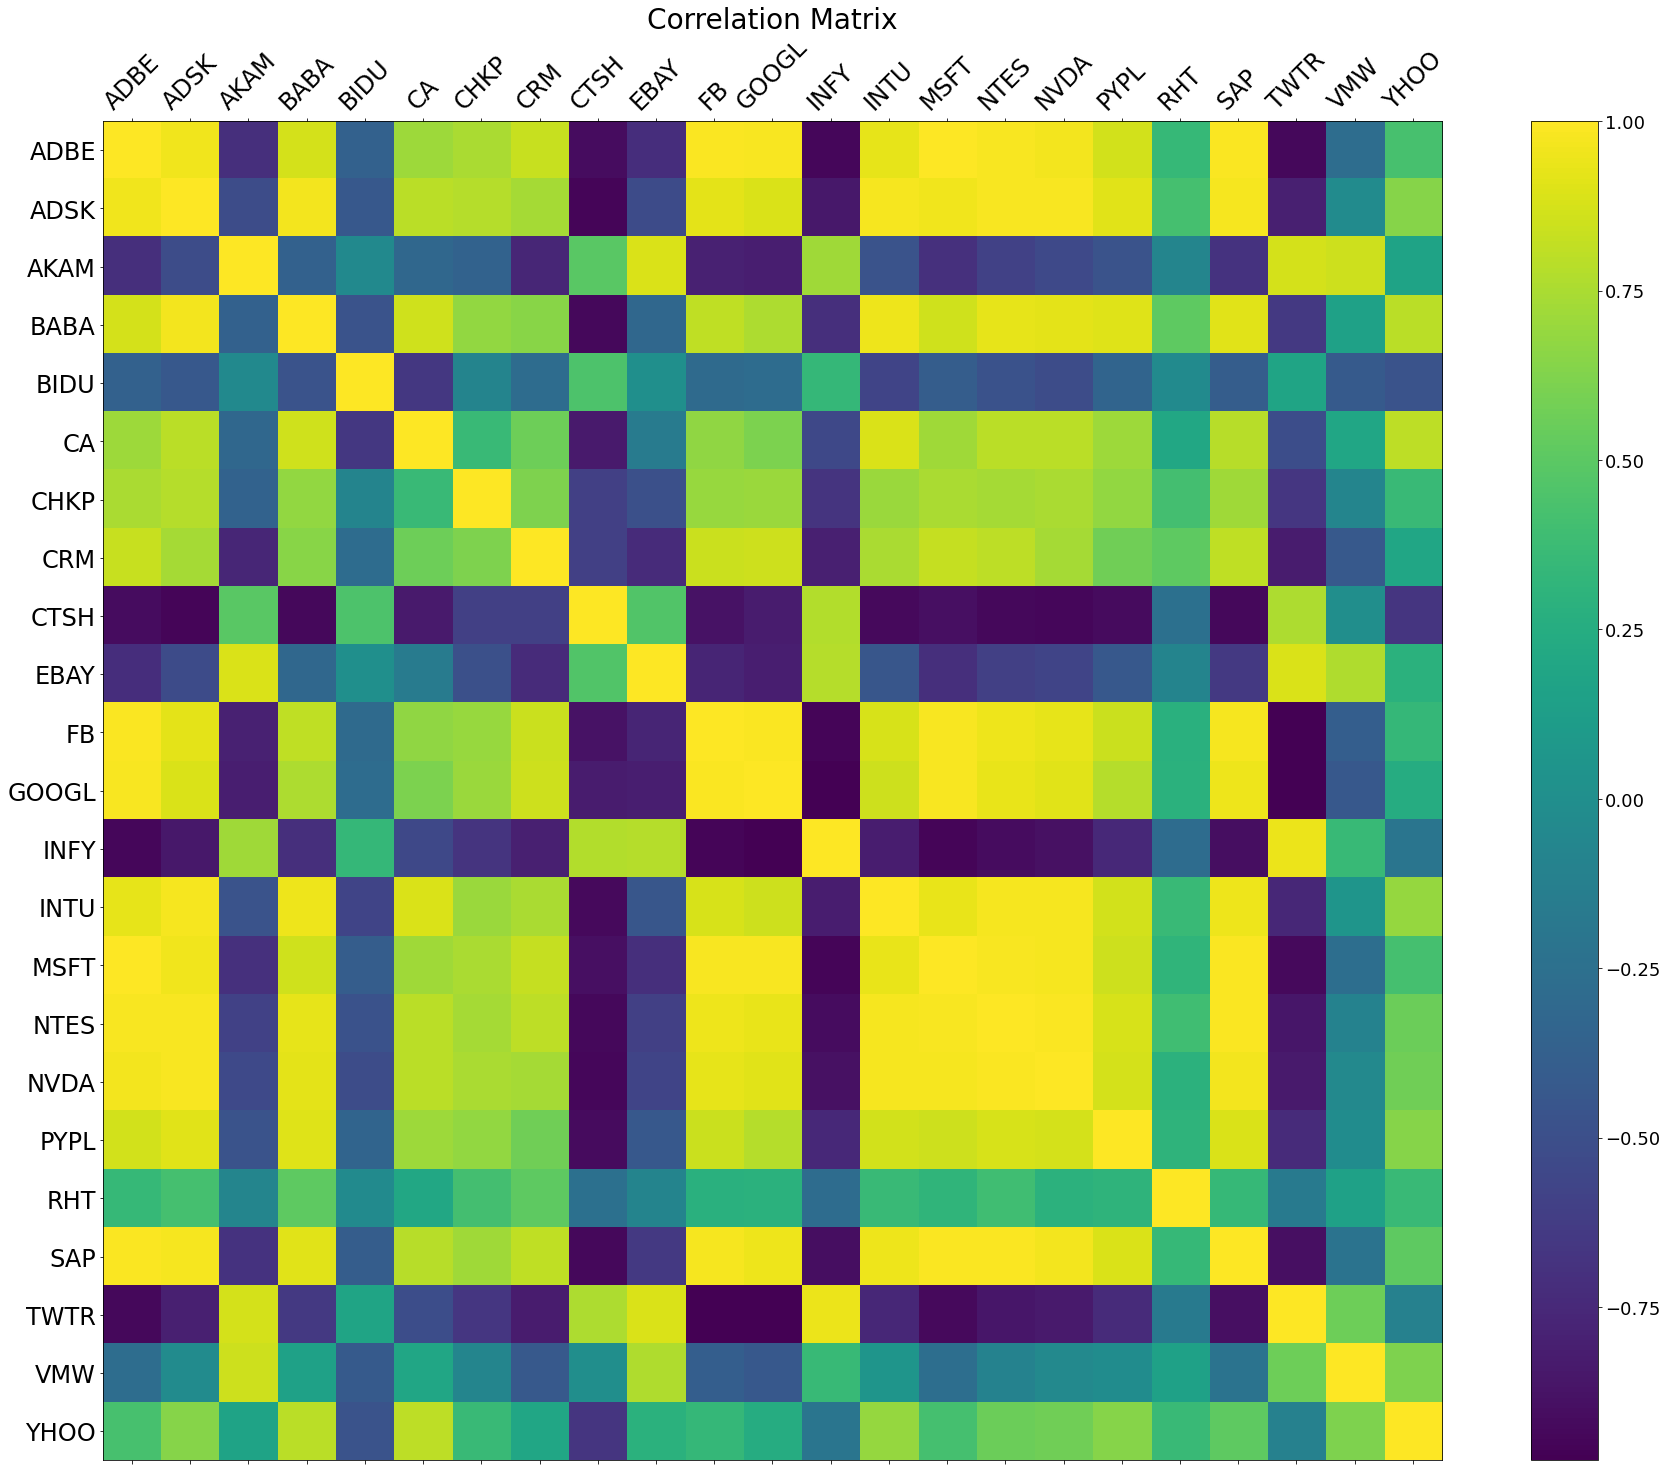

In [46]:
f = plt.figure(figsize=(32, 24))
plt.matshow(cor.corr(), fignum=f.number)
plt.xticks(range(cor.select_dtypes(['number']).shape[1]), cor.select_dtypes(['number']).columns, fontsize=24, rotation=45)
plt.yticks(range(cor.select_dtypes(['number']).shape[1]), cor.select_dtypes(['number']).columns, fontsize=24)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=18)
plt.title('Correlation Matrix', fontsize=28)

<p>4. Определение акций с максимальной (max) и минимальной корреляцией (min) и акции, которая больше всего соответствует отсутствию какой-либо корреляции (none), для MSFT</p>

In [47]:
a = cor['MSFT'].drop('MSFT')

for row in a.index:
    if a.loc[row] == max(a):
        max_cor = row
    elif a.loc[row] == min(a):
        min_cor = row
    elif abs(a.loc[row]) == min(abs(a)):
        non_cor = row

print('max_correlation: ' + max_cor)
print('min_correlation: ' + min_cor)
print('no_correlation: ' + non_cor)

max_correlation: SAP
min_correlation: TWTR
no_correlation: VMW


<p>5. Построение диаграммы разброса (MSFT - компания с min), (MSFT - компания с max), (MSFT - компания с none)</p>

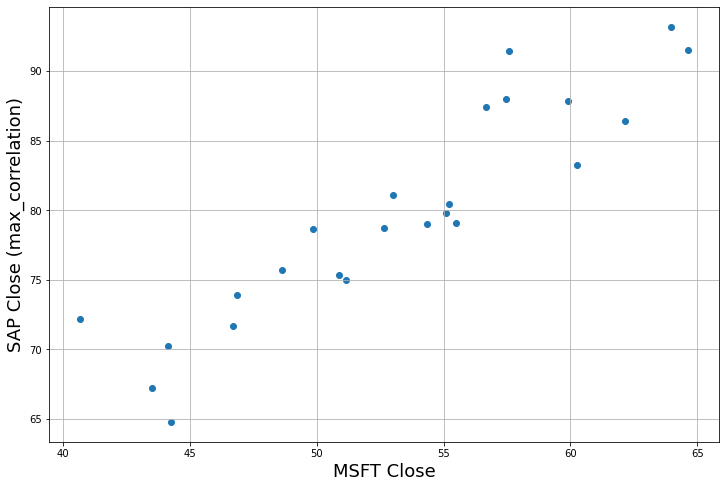

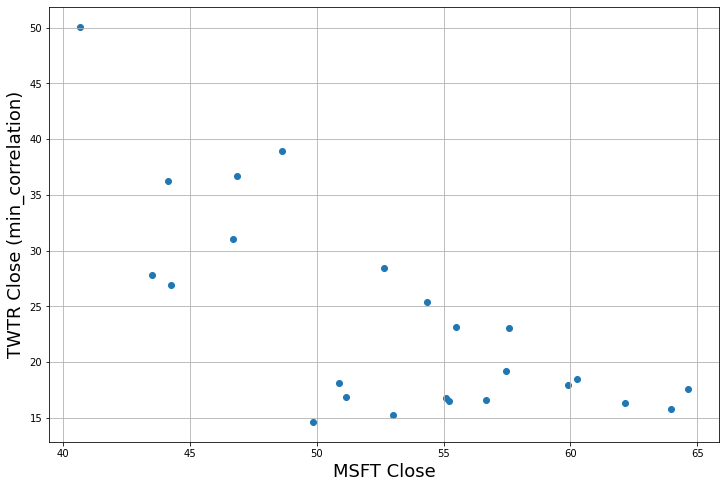

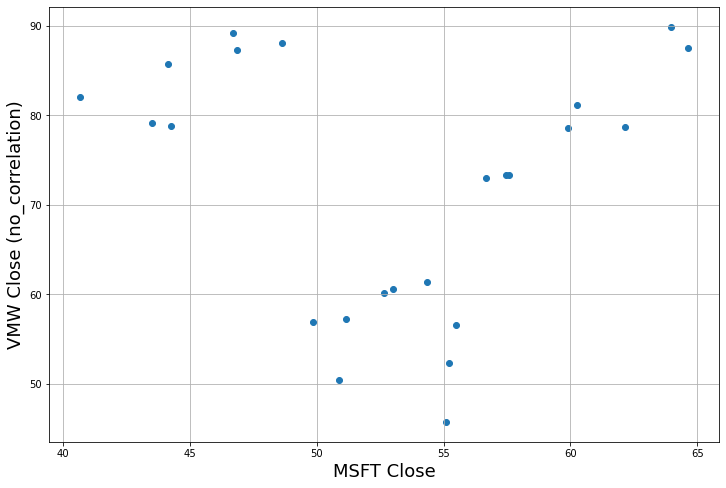

In [48]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data['MSFT'], data[max_cor])
ax.set_xlabel('MSFT Close', fontsize=18)
ax.set_ylabel(max_cor+' Close (max_correlation)', fontsize=18)
plt.grid()

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data['MSFT'], data[min_cor])
ax.set_xlabel('MSFT Close', fontsize=18)
ax.set_ylabel(min_cor+' Close (min_correlation)', fontsize=18)
plt.grid()

fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(data['MSFT'], data[non_cor])
ax.set_xlabel('MSFT Close', fontsize=18)
ax.set_ylabel(non_cor+' Close (no_correlation)', fontsize=18)
plt.grid()

<p>6. Расчет средней цены акций для каждого месяца</p>

In [49]:
data_mean = data.mean(axis=1)
data_mean

Date
2017-02-01    122.210869
2017-01-03    117.401739
2016-12-01    109.423044
2016-11-01    109.284782
2016-10-03    112.875653
2016-09-01    111.394783
2016-08-01    107.825217
2016-07-01    105.233915
2016-06-01     98.156523
2016-05-02    101.787825
2016-04-01     96.432609
2016-03-01     99.561306
2016-02-01     88.829090
2016-01-04     91.659999
2015-12-01     97.331364
2015-11-02     97.221363
2015-10-01     94.246364
2015-09-01     83.863182
2015-08-03     84.474546
2015-07-01     90.353636
2015-06-01     87.711903
2015-05-01     90.564762
2015-04-01     89.109049
2015-03-02     88.030001
dtype: float64

<p>7. Построение графиков для акций из пункта 4 и средней из пункта 6</p>

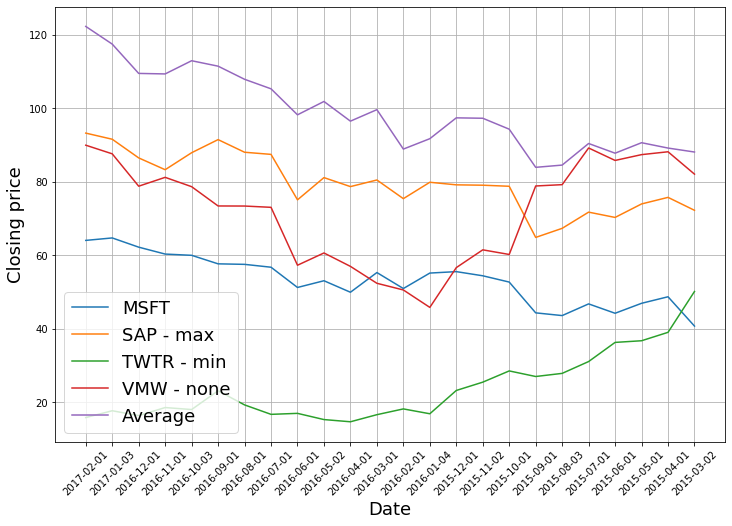

In [51]:
fig, ax = plt.subplots(figsize=(12,8))
plt.plot( data['MSFT'], label='MSFT' )
plt.plot( data[max_cor], label=max_cor + ' - max' )
plt.plot( data[min_cor], label=min_cor + ' - min' )
plt.plot( data[non_cor], label=non_cor + ' - none' )
plt.plot( data_mean, label='Average' )
ax.set_xlabel('Date', fontsize=18)
plt.xticks(rotation=45)
ax.set_ylabel('Closing price', fontsize=18)
plt.grid()
plt.legend(loc=0, prop={'size': 18})